In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer #--> For Predicting Missing Values

In [2]:
# Import the dataset
A_train = pd.read_csv('/home/centipede/Programs & Projects/Machine Learning/Predicting Housing Prices/Data/train.csv')
A_test = pd.read_csv('/home/centipede/Programs & Projects/Machine Learning/Predicting Housing Prices/Data/test.csv')
train_length=1460
saleprice = pd.DataFrame(A_train.iloc[:,-1])

In [3]:
# combined the data
all_data = pd.concat([A_train.drop(columns=['SalePrice']), A_test])

In [4]:
all_data.shape

(2919, 80)

In [5]:
all_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


# Correlation Map
_Checking correlation To find the variable important for predicting target 
variable 'SalePrice'_

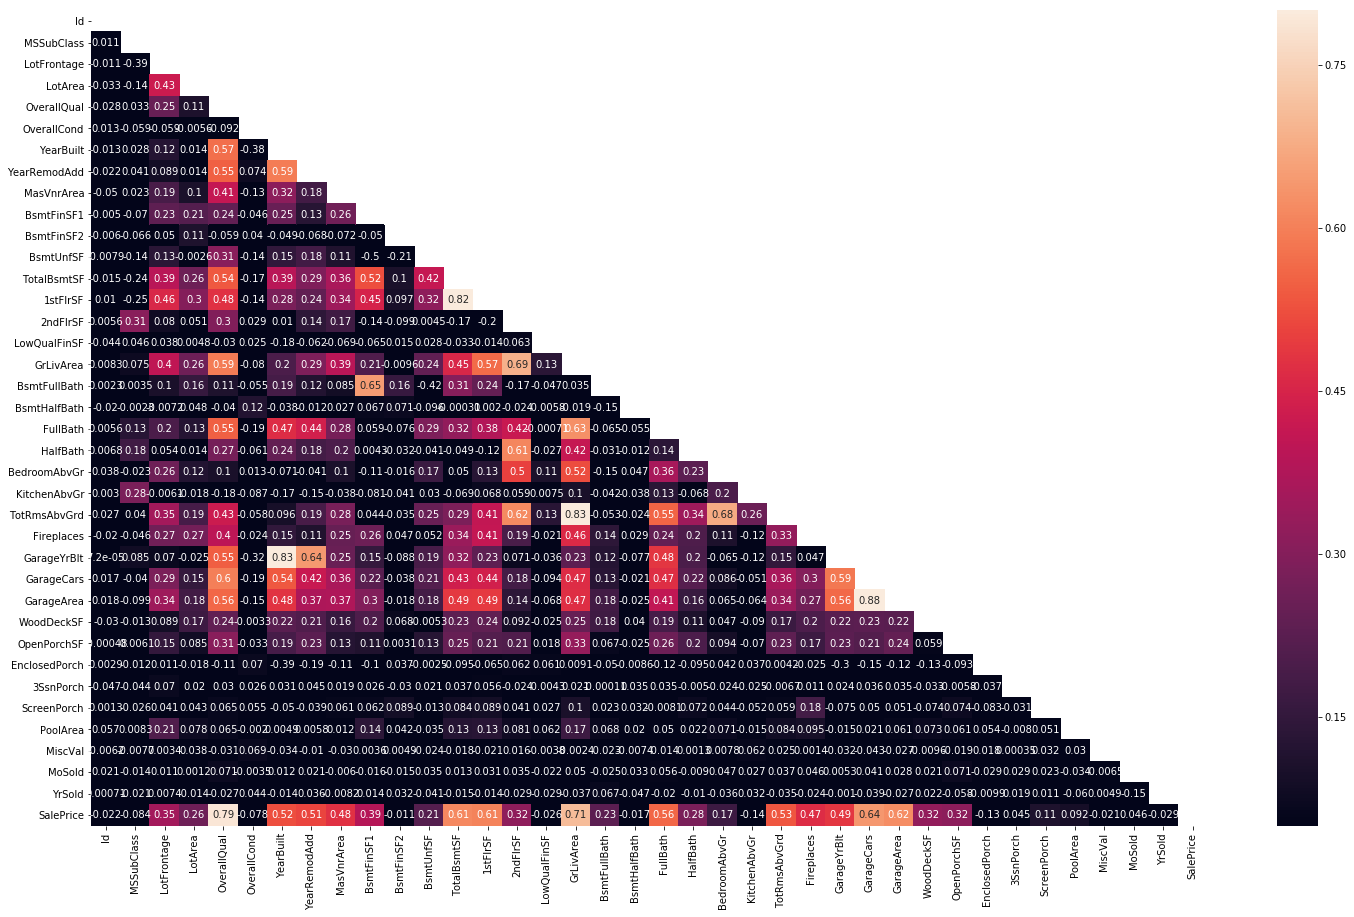

In [6]:
corr_mat = A_train.corr()

# This creates a mask for upper triangle as the upper triangle will only 
#be a repetition of the lower one
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# setting the figure
f, ax = plt.subplots(figsize=(25,15))

# Heatmap
sns.heatmap(corr_mat, mask=mask, vmax=0.8, vmin=0.05, annot=True)


Text(0.5, 1.0, 'Correlation Graph between Features and Sales Price')

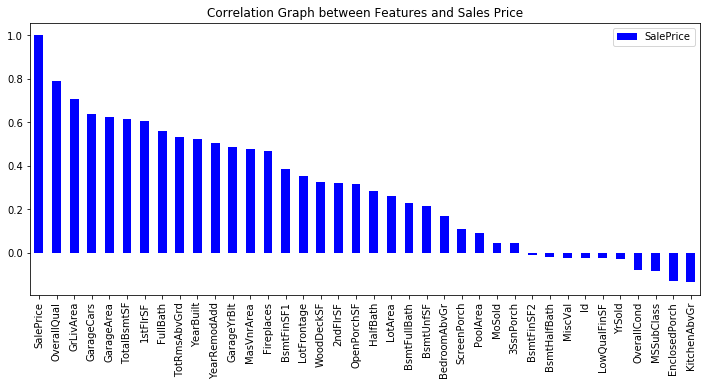

In [7]:
# Variable correlating to "SalePrice"
df = pd.DataFrame(A_train.corr()['SalePrice'].sort_values(ascending=False))
df.plot(kind='bar', figsize=(12,5), color='blue')
plt.title('Correlation Graph between Features and Sales Price')

Now we can drop the variables with ow correlation with the target variables or have high correlation with target variable but are giving same information as another variable 

Text(0.5, 1.0, 'OverallQual')

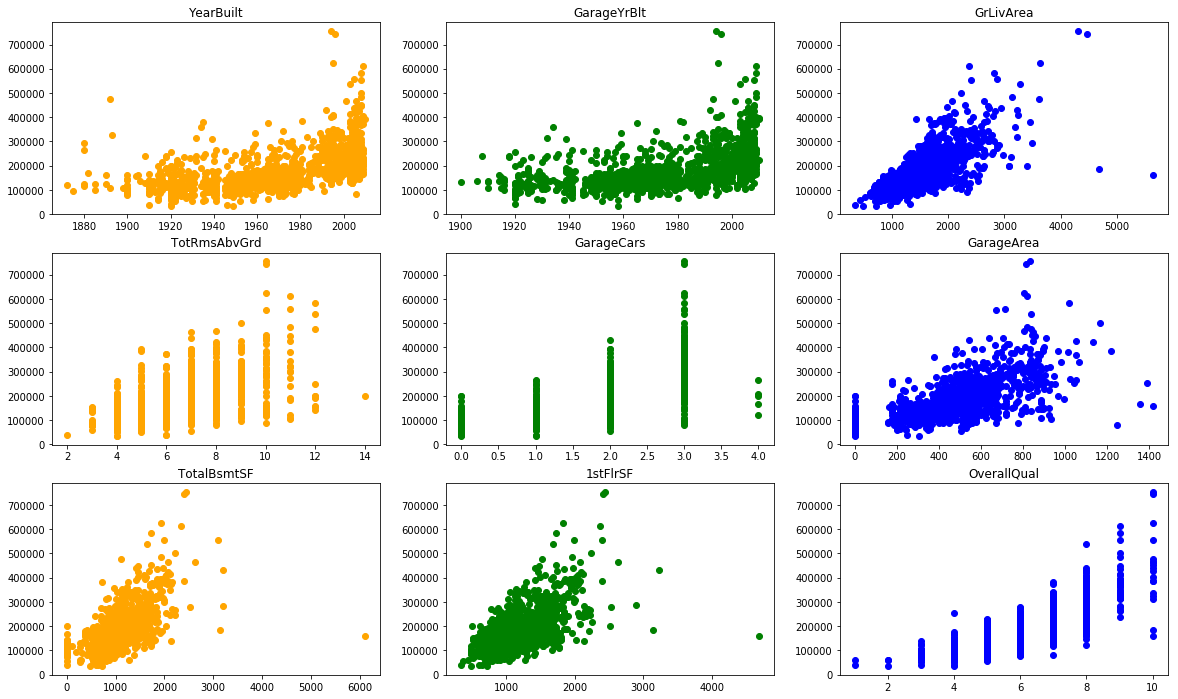

In [8]:
fig, axes = plt.subplots(nrows= 3,ncols = 3, figsize=(20,12))

axes[0,0].scatter(A_train['YearBuilt'], A_train['SalePrice'], color='orange')
axes[0,1].scatter(A_train['GarageYrBlt'], A_train['SalePrice'],  color='green')
axes[0,2].scatter(A_train['GrLivArea'], A_train['SalePrice'], color='blue')


axes[1,0].scatter(A_train['TotRmsAbvGrd'], A_train['SalePrice'],  color='orange')
axes[1,1].scatter(A_train['GarageCars'], A_train['SalePrice'], color='green')
axes[1,2].scatter(A_train['GarageArea'], A_train['SalePrice'],  color='blue')

axes[2,0].scatter(A_train['TotalBsmtSF'], A_train['SalePrice'],  color='orange')
axes[2,1].scatter(A_train['1stFlrSF'], A_train['SalePrice'], color='green')
axes[2,2].scatter(A_train['OverallQual'], A_train['SalePrice'],  color='blue')

#Naming Titles Of The Columns  
axes[0,0].set_title('YearBuilt')
axes[0,1].set_title('GarageYrBlt')
axes[0,2].set_title('GrLivArea')

axes[1,0].set_title('TotRmsAbvGrd')
axes[1,1].set_title('GarageCars')
axes[1,2].set_title('GarageArea')


axes[2,0].set_title('TotalBsmtSF')
axes[2,1].set_title('1stFlrSF')
axes[2,2].set_title('OverallQual')

In [9]:
# Now Lets CHeck for null values
null = all_data.isnull().sum().sort_values(ascending=False)
train_nan = (null[null>0])
dict(train_nan)
train_nan                        

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
Exterior2nd        1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

Text(0.5, 1.0, 'Missing  Data In our Dataset')

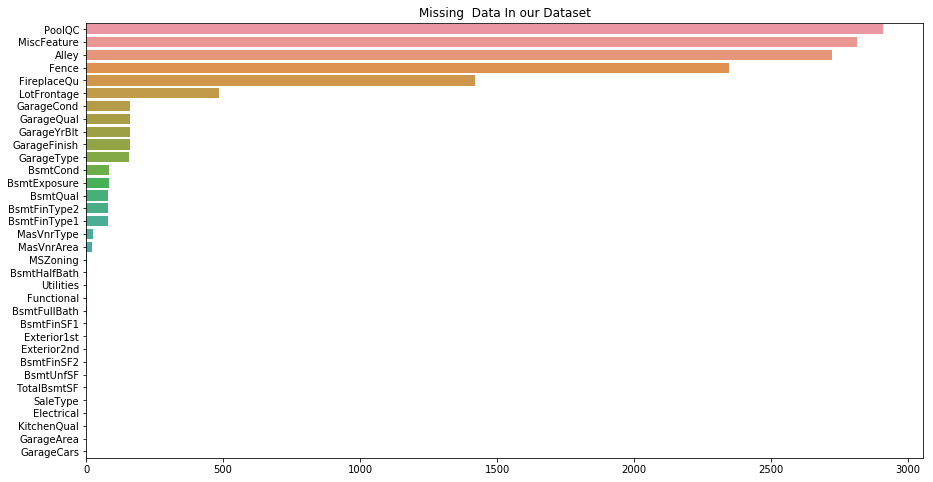

In [10]:
# visualizing null values to better understand
plt.figure(figsize=(15,8))
sns.barplot(train_nan,train_nan.index)
plt.title('Missing  Data In our Dataset')

In [11]:
# Now we will fill the missing values
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

all_data["Alley"] = all_data["Alley"].fillna("None")

all_data["Fence"] = all_data["Fence"].fillna("None")

all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

# We Group by neighborhood then filling in the missing values by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] =all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data["Functional"] = all_data["Functional"].fillna("Typ")

all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")


# Skewness
_checking the skewness of 'SalePrice' to see distribution of data_

In [12]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
(mu, sigma) = norm.fit(saleprice['SalePrice'])

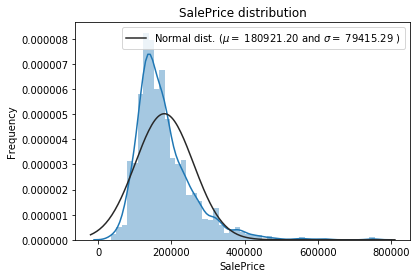

In [13]:
# Checking The skewness of the  Salesprice Column 
(mu, sigma) = norm.fit(saleprice['SalePrice'])
sns.distplot(saleprice['SalePrice'],fit=norm)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')

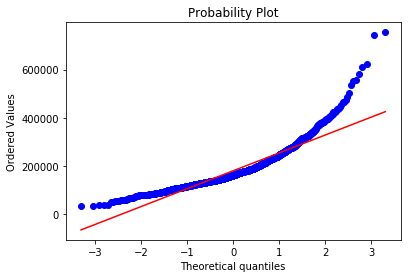

In [14]:
q_plot = stats.probplot(saleprice['SalePrice'], plot=plt)

As it can be seen the given data is Right Skewed i.e there are Less Data Points in the upper bound towards the ___'Higher Values'___

Hence we need to apply the ___'log transformation'___ On The ___'SalePrice'___ column to make sure that atleast most of the datapoints fall on the line of the Q-Q plot(using log(1+x) to do this)

In [15]:
saleprice["SalePrice"] = np.log1p(saleprice["SalePrice"])
y=saleprice
y.head()

,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220


skewness of data when it is normalized

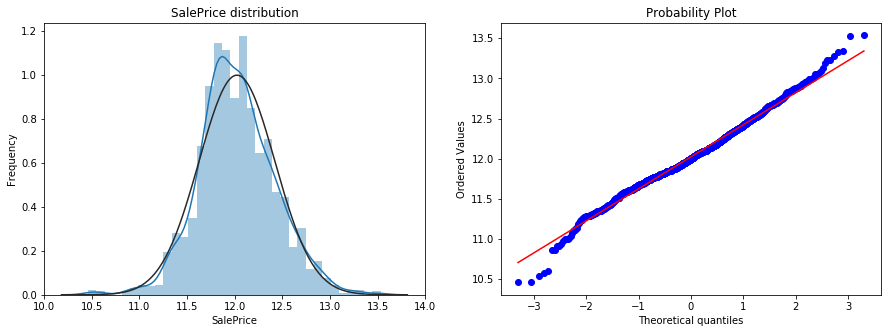

In [16]:
# The Data will be Normalised when the Blue Dots are close to the Red Line 

(mu, sigma) = norm.fit(saleprice["SalePrice"])
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(saleprice["SalePrice"], fit=norm)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1, 2, 2)

quantile_plot=stats.probplot(saleprice['SalePrice'], plot=plt)

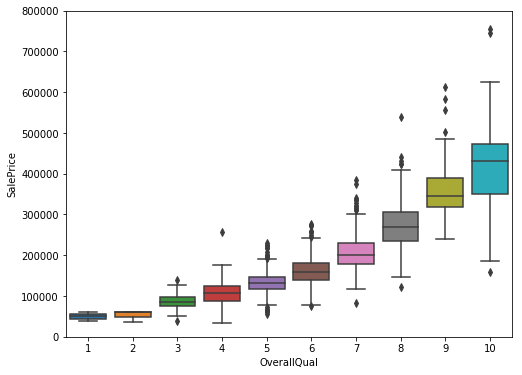

In [17]:
# plot of SalePrice and OverallQual
qual = 'OverallQual'
dt = pd.concat([A_train['SalePrice'], A_train[qual]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=qual, y="SalePrice", data=dt)
fig.axis(ymin=0, ymax=800000);
plt.savefig('lethabo.png')

___The plot shows that the datapoints are better distributed then before___

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

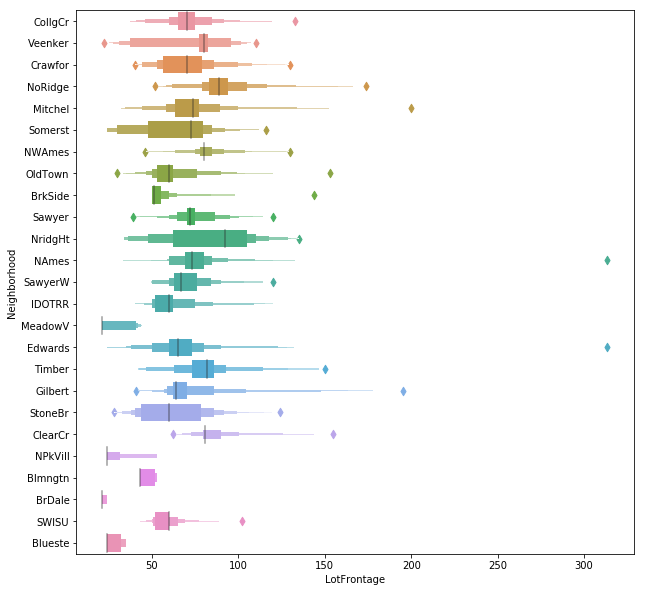

In [18]:
plt.figure(figsize=(10,10))
sns.boxenplot(all_data["LotFrontage"],all_data["Neighborhood"])

# Dropping columns with less correlation

In [19]:
all_data=all_data.drop(['GarageYrBlt','TotRmsAbvGrd','GarageArea','PoolQC', 'MiscFeature', 'Fence','MiscVal','PoolArea','Utilities'], axis=1)

In [20]:
all_data['TotalBath'] = all_data['FullBath'] + all_data['HalfBath']*0.5 + all_data['BsmtFullBath'] + all_data['BsmtHalfBath']*0.5
all_data['TotalFlrSF'] = all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['BsmtFinSF'] = all_data['BsmtFinSF1'] + all_data['BsmtFinSF2']

# Deleting single columns since we have combined them above:

singles_to_drop = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2']
for col in singles_to_drop:
    all_data.drop([col], axis =1, inplace = True)

## Converting categorical values to numerical

In [21]:
all_data = pd.get_dummies(all_data)
X_test=all_data.iloc[train_length:,:]
X_train=all_data.iloc[:train_length,:]

X=X_train

In [22]:
all_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
# Cross Validation function

n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

_Stacking all the models together so that we can improve our predictive score_

In [24]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [25]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [26]:
import random
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.04, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =random.randint(0,int(2**16)), nthread = -1)

In [27]:
lgb_model = lgb.LGBMRegressor(lcolsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.04, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =random.randint(0,int(2**16)), nthread = -1)

# Model Scores

In [29]:
score = rmse_cv(lasso)
print("\nLASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LASSO: 0.1354 (0.0290)



In [30]:
score = rmse_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1353 (0.0288)



In [31]:
score = rmse_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=9.14248e-19): result may not be accurate.
  overwrite_a=False)
/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=1.85648e-18): result may not be accurate.
  overwrite_a=False)
/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=1.1444e-18): result may not be accurate.
  overwrite_a=False)


Kernel Ridge score: 0.5766 (0.1613)



/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=7.704e-19): result may not be accurate.
  overwrite_a=False)
/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=7.33039e-19): result may not be accurate.
  overwrite_a=False)


In [32]:
score = rmse_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Gradient Boosting score: 0.1220 (0.0109)



In [33]:
score = rmse_cv(model_xgb)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1216 (0.0100)



In [34]:
score = rmse_cv(lgb_model)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Gradient Boosting score: 0.1274 (0.0077)



___Stacking our models considering only those that have good mean scores___

In [35]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # predictions for cloned models and averaging
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [36]:
averaged_models = AveragingModels(models = (GBoost, lasso,KRR,model_xgb))

score = rmse_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=9.14248e-19): result may not be accurate.
  overwrite_a=False)
/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=1.85648e-18): result may not be accurate.
  overwrite_a=False)
/home/centipede/anaconda3/lib/python3.7/site-packages/

 Averaged base models score: 0.1868 (0.0304)



In [37]:
# Predictions
averaged_models.fit(X,y)

/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/centipede/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=3.80872e-19): result may not be accurate.
  overwrite_a=False)


AveragingModels(models=(GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_...=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)))

In [38]:
y_average=np.expm1(averaged_models.predict(X_test))

In [40]:
sample =pd.read_csv('/home/centipede/Programs & Projects/Machine Learning/Predicting Housing Prices/Data/sample_submission.csv')
sales=pd.DataFrame(y_average,columns=['SalePrice'])
sample['SalePrice']=sales['SalePrice']
sample.head()

,Id,SalePrice
0,1461,116071.959976
1,1462,149025.778934
2,1463,188600.629631
3,1464,204139.545341
4,1465,187909.156793


In [41]:
sample.to_csv('avg6.csv',index=False)

In [42]:
dp = pd.read_csv('/home/centipede/Programs & Projects/Machine Learning/Predicting Housing Prices/avg6.csv')
dp.head(50)

,Id,SalePrice
0,1461,116071.959976
1,1462,149025.778934
2,1463,188600.629631
3,1464,204139.545341
4,1465,187909.156793
5,1466,177846.183289
6,1467,171146.437513
7,1468,169028.731457
8,1469,184773.085577
9,1470,128661.396973
